# Multiple Linear Regression
## Bike Sharing Assignment 

#### Problem Statement:  The objective of this Case is to Predication of bike rental count based on the environmental and seasonal settings.


The company wants to know:

- Which variables are significant in predicting the demand for shared bikes. <BR>
- How well those variables describe the bike demands

## Step 1: Reading and Understanding the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
day = pd.read_csv("day.csv")
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
day.shape

(730, 16)

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#Rename the columns for better understanding 

day.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)



In [7]:
#Replacing the datetime and numerical attributes to object/category

day['datetime']=pd.to_datetime(day.datetime)

day['season'] = day['season'].replace([1] ,"spring" )
day['season'] = day['season'].replace([2] ,"summer" )
day['season'] = day['season'].replace([3] ,"fall" )
day['season'] = day['season'].replace([4] ,"winter" )

In [8]:
day['month'] = day['month'].replace([1] ,"Jan" )
day['month'] = day['month'].replace([2] ,"Feb" )
day['month'] = day['month'].replace([3] ,"Mar" )
day['month'] = day['month'].replace([4] ,"Apr" )
day['month'] = day['month'].replace([5] ,"May" )
day['month'] = day['month'].replace([6] ,"Jun" )
day['month'] = day['month'].replace([7] ,"Jul" )
day['month'] = day['month'].replace([8] ,"Aug" )
day['month'] = day['month'].replace([9] ,"Sep" )
day['month'] = day['month'].replace([10],"Oct" )
day['month'] = day['month'].replace([11] ,"Nov")
day['month'] = day['month'].replace([12] ,"Dec")

In [9]:
day['weather_condition'] = day['weather_condition'].replace([1] ,"Clear")
day['weather_condition'] = day['weather_condition'].replace([2] ,"Mist_Cloud")
day['weather_condition'] = day['weather_condition'].replace([3] ,"Light_Snow")
day['weather_condition'] = day['weather_condition'].replace([4] ,"Heavy_Rain")

In [10]:
day['weekday']= day['weekday'].replace([1] ,"Mon")
day['weekday']= day['weekday'].replace([2] ,"Tue") 
day['weekday']= day['weekday'].replace([3] ,"Wed") 
day['weekday']= day['weekday'].replace([4] ,"Thu")
day['weekday']= day['weekday'].replace([5] ,"Fri")
day['weekday']= day['weekday'].replace([6] ,"Sat")
day['weekday']= day['weekday'].replace([7] ,"Sun")


In [11]:
day['holiday']=day.holiday.astype('category')
day['workingday']=day.workingday.astype('category')
day['year']=day.year.astype('category')

In [12]:
day.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             730 non-null    int64         
 1   datetime           730 non-null    datetime64[ns]
 2   season             730 non-null    object        
 3   year               730 non-null    category      
 4   month              730 non-null    object        
 5   holiday            730 non-null    category      
 6   weekday            730 non-null    object        
 7   workingday         730 non-null    category      
 8   weather_condition  730 non-null    object        
 9   temp               730 non-null    float64       
 10  atemp              730 non-null    float64       
 11  humidity           730 non-null    float64       
 12  windspeed          730 non-null    float64       
 13  casual             730 non-null    int64         
 14  registered

In [14]:
day.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

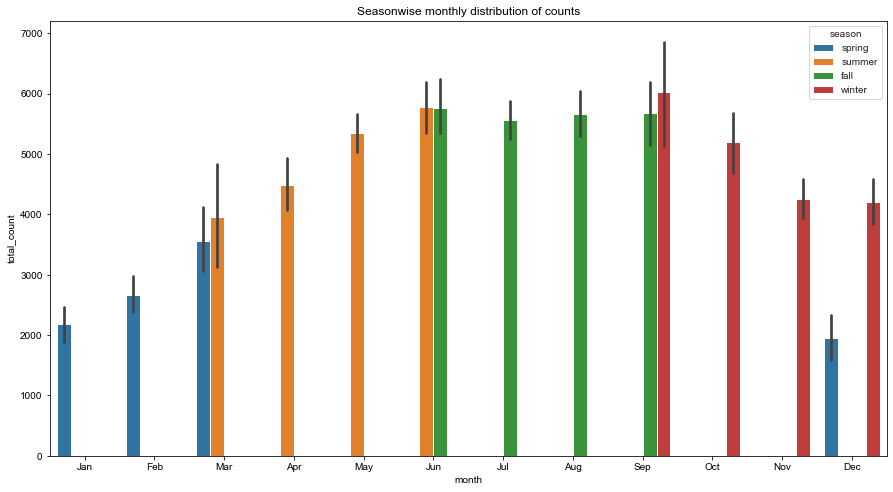

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=day[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()

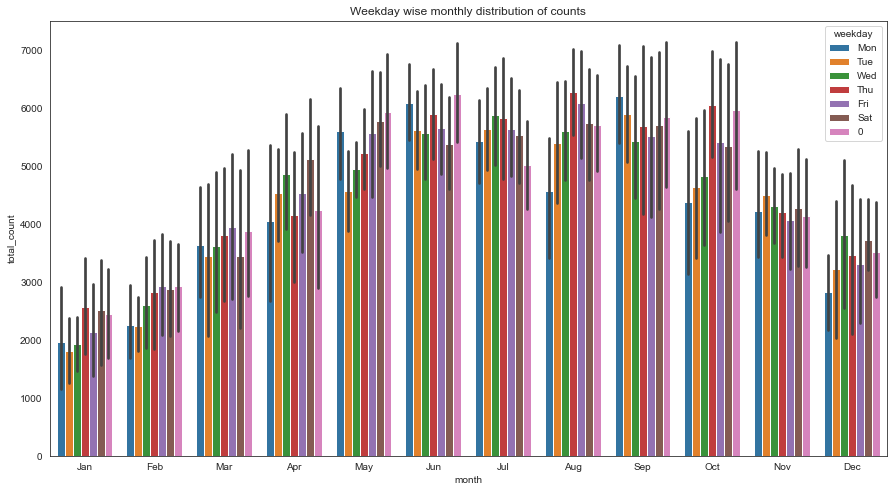

In [17]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=day[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')
plt.show() 

From the above plots, we can observed that increasing the bike rental count in springe and summer season and then decreasing the bike rental count in fall and winter season.

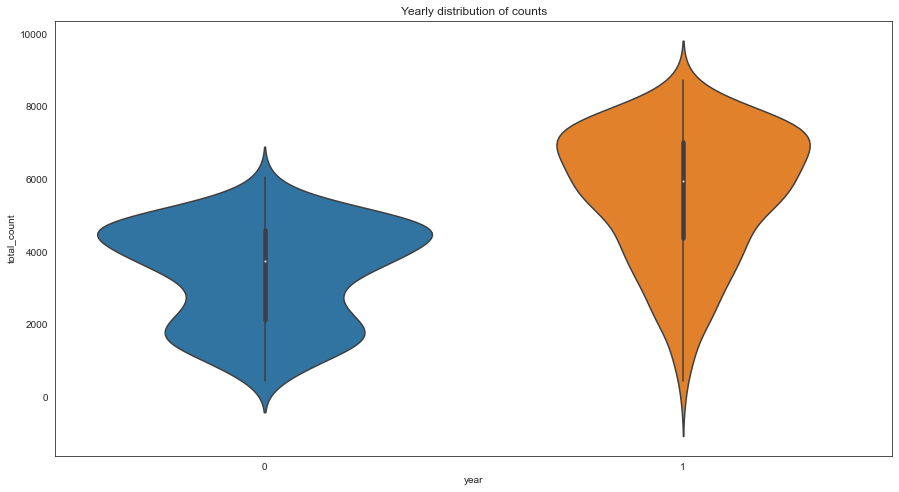

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='total_count',data=day[['year','total_count']])
ax.set_title('Yearly distribution of counts')
plt.show()

From the violin plot, we can observed that the bike rental count distribution is highest in year 2018 then in year 2019.

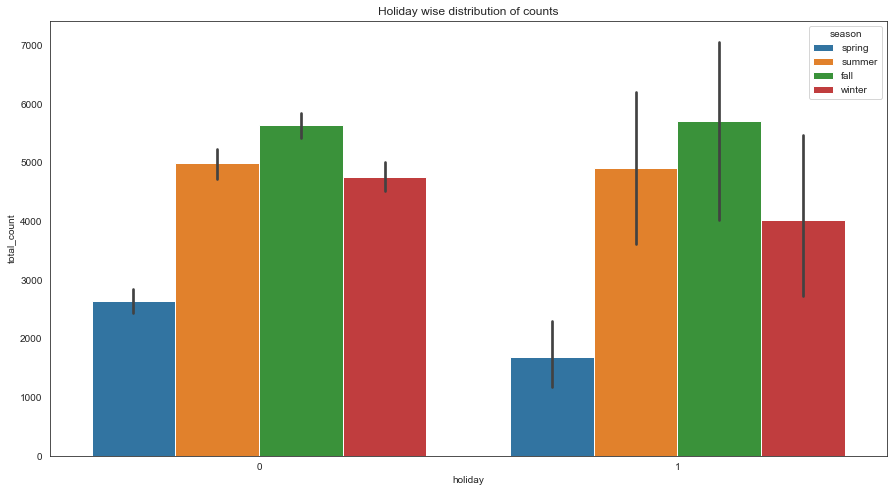

In [19]:
#Holiday wise distribution of counts
fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=day,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during no holiday the bike rental counts is highest compared to during holiday for different seasons.

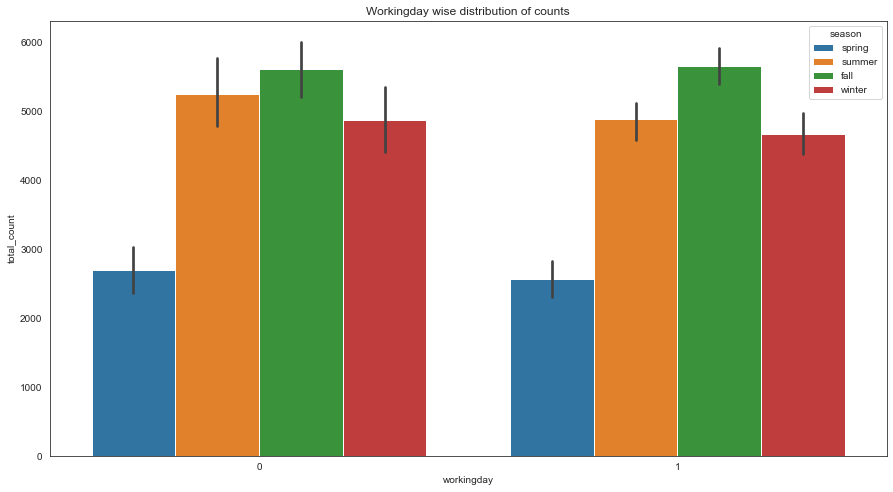

In [20]:
#Workingday wise distribution of counts
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=day,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

From the above bar plot, we can observed that during workingday the bike rental counts is quite highest compared to during no workingday for different seasons.

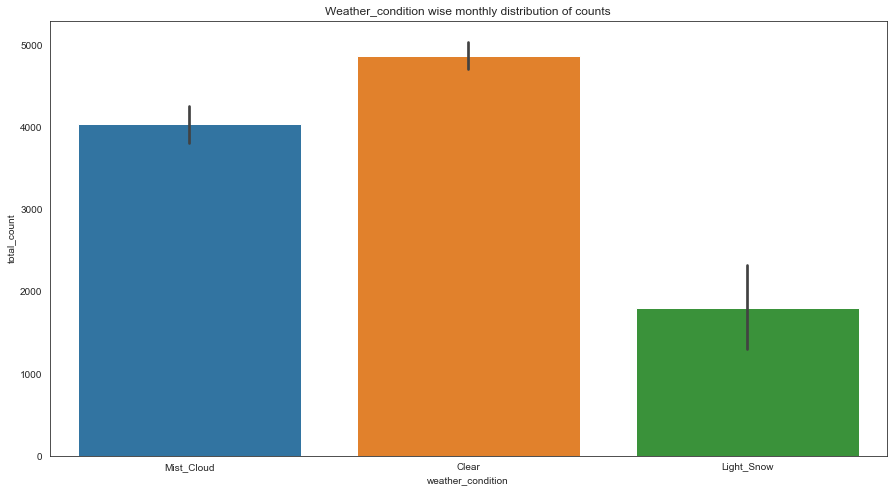

In [21]:
#Bar plot for weather_condition distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='weather_condition',y='total_count',data=day[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

From the above bar plot, we can observed that during clear,partly cloudy weather the bike rental count is highest and the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

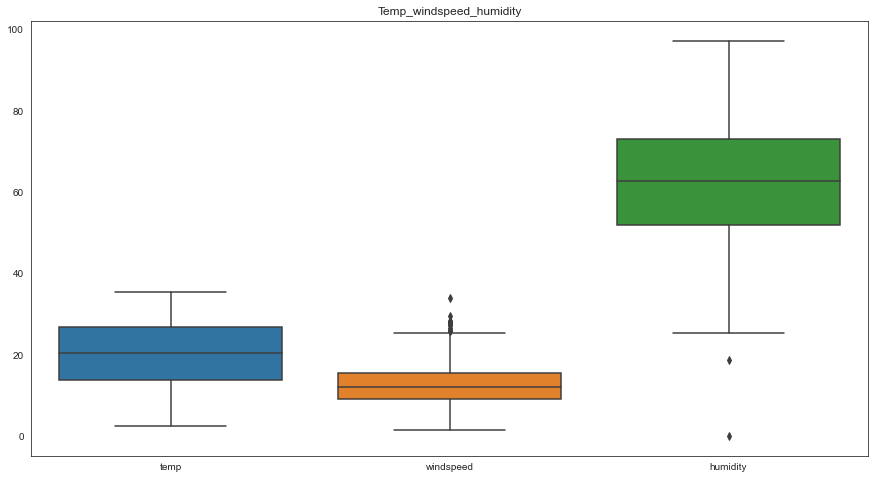

In [22]:
fig,ax=plt.subplots(figsize=(15,8))

#Box plot for Temp_windspeed_humidity_outliers

sns.boxplot(data=day[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity')
plt.show()

## Correlation matrix

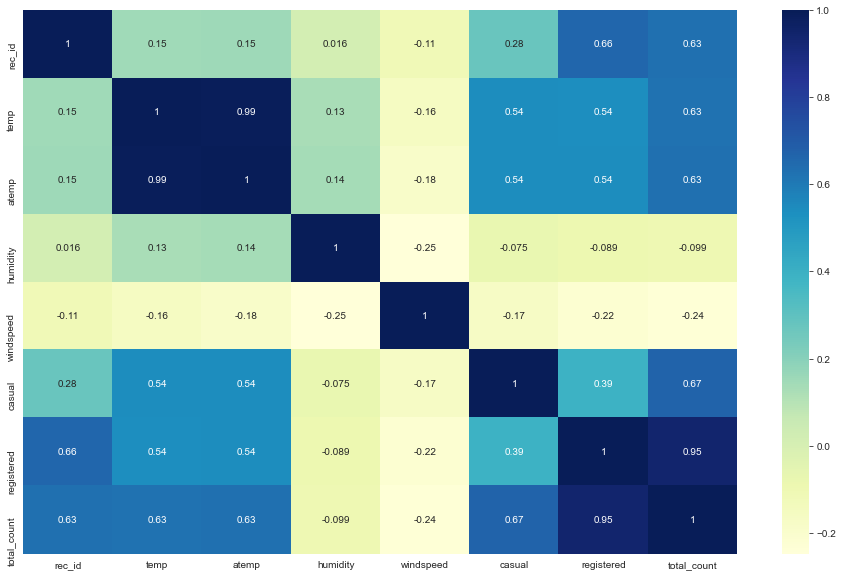

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(day.corr(), annot = True, cmap="YlGnBu")
plt.show()

From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. The temp and atemp are highly positively correlated to each other, it means that both are carrying same information.The total_count,casual and registered are highly positively correlated to each other. So, we are going to ignore atemp,casual and registered variable for further analysis.

##  Step: 3 Data Preparation

In [24]:
day.head()

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Mist_Cloud,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Mist_Cloud,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [25]:
day.drop(columns = ["rec_id","datetime","atemp","casual","registered"], axis = 1, inplace = True)
day.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count
0,spring,0,Jan,0,Mon,1,Mist_Cloud,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Cloud,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600


### Dummy Variables

In [26]:
status1 = pd.get_dummies(day["season"])
status1.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [27]:
# Let's drop the first column from status df using 'drop_first = True'
status1 = pd.get_dummies(day['season'], drop_first = True)

In [28]:
# Add the results to the original housing dataframe
day = pd.concat([day, status1], axis = 1)
day.head()

,season,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count,spring,summer,winter
0,spring,0,Jan,0,Mon,1,Mist_Cloud,14.110847,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tue,1,Mist_Cloud,14.902598,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [29]:
day.drop(['season'], axis = 1, inplace = True)

day.head()

,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count,spring,summer,winter
0,0,Jan,0,Mon,1,Mist_Cloud,14.110847,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Tue,1,Mist_Cloud,14.902598,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,0,0


In [30]:
status2 = pd.get_dummies(day["month"])
status2.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [31]:
# Let's drop the first column from status df using 'drop_first = True'
status2 = pd.get_dummies(day['month'], drop_first = True)

In [32]:
# Add the results to the original housing dataframe
day = pd.concat([day, status2], axis = 1)
day.head()

,year,month,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,Jan,0,Mon,1,Mist_Cloud,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Tue,1,Mist_Cloud,14.902598,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [33]:
day.drop(['month'], axis = 1, inplace = True)

day.head()

,year,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count,spring,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Mon,1,Mist_Cloud,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,Tue,1,Mist_Cloud,14.902598,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [34]:
status3 = pd.get_dummies(day["weekday"])
status3.head()

,0,Fri,Mon,Sat,Thu,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0


In [35]:
# Let's drop the first column from status df using 'drop_first = True'
status3 = pd.get_dummies(day['weekday'], drop_first = True)

In [36]:
# Add the results to the original housing dataframe
day = pd.concat([day, status3], axis = 1)
day.head()

,year,holiday,weekday,workingday,weather_condition,temp,humidity,windspeed,total_count,spring,...,May,Nov,Oct,Sep,Fri,Mon,Sat,Thu,Tue,Wed
0,0,0,Mon,1,Mist_Cloud,14.110847,80.5833,10.749882,985,1,...,0,0,0,0,0,1,0,0,0,0
1,0,0,Tue,1,Mist_Cloud,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,Wed,1,Clear,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,Thu,1,Clear,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,Fri,1,Clear,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,1,0,0,0,0,0


In [37]:
day.drop(['weekday'], axis = 1, inplace = True)

day.head()

,year,holiday,workingday,weather_condition,temp,humidity,windspeed,total_count,spring,summer,...,May,Nov,Oct,Sep,Fri,Mon,Sat,Thu,Tue,Wed
0,0,0,1,Mist_Cloud,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,Mist_Cloud,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,1,0,0,0,0,0


In [38]:
status4 = pd.get_dummies(day["weather_condition"])
status4.head()

,Clear,Light_Snow,Mist_Cloud
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
# Let's drop the first column from status df using 'drop_first = True'
status4 = pd.get_dummies(day['weather_condition'], drop_first = True)

In [40]:
# Add the results to the original housing dataframe
day = pd.concat([day, status4], axis = 1)
day.head()

,year,holiday,workingday,weather_condition,temp,humidity,windspeed,total_count,spring,summer,...,Oct,Sep,Fri,Mon,Sat,Thu,Tue,Wed,Light_Snow,Mist_Cloud
0,0,0,1,Mist_Cloud,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,Mist_Cloud,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,Clear,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,Clear,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,Clear,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [41]:
day.columns

Index(['year', 'holiday', 'workingday', 'weather_condition', 'temp',
       'humidity', 'windspeed', 'total_count', 'spring', 'summer', 'winter',
       'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Sep', 'Fri', 'Mon', 'Sat', 'Thu', 'Tue', 'Wed', 'Light_Snow',
       'Mist_Cloud'],
      dtype='object')

In [42]:
day.drop(['weather_condition'], axis = 1, inplace = True)

day.head()

,year,holiday,workingday,temp,humidity,windspeed,total_count,spring,summer,winter,...,Oct,Sep,Fri,Mon,Sat,Thu,Tue,Wed,Light_Snow,Mist_Cloud
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step : 4 Splitting the Data into Training and Testing Sets

In [43]:
from sklearn.model_selection import train_test_split


df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

We will use MinMax scaling.

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [45]:

num_vars = ['temp', 'humidity', 'windspeed','total_count']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,year,holiday,workingday,temp,humidity,windspeed,total_count,spring,summer,winter,...,Oct,Sep,Fri,Mon,Sat,Thu,Tue,Wed,Light_Snow,Mist_Cloud
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,1,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Dividing into X and Y sets for the model building

In [46]:
y_train = df_train.pop('total_count')
X_train = df_train

## Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [47]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [48]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [49]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Fri', False, 5),
 ('Mon', False, 7),
 ('Sat', False, 11),
 ('Thu', False, 4),
 ('Tue', False, 8),
 ('Wed', False, 6),
 ('Light_Snow', True, 1),
 ('Mist_Cloud', True, 1)]

In [50]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Light_Snow',
       'Mist_Cloud'],
      dtype='object')

In [51]:
X_train.columns[~rfe.support_]

Index(['workingday', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Fri', 'Mon',
       'Sat', 'Thu', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [52]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [55]:
lm.params

const         0.320243
year          0.230328
holiday      -0.091228
temp          0.479977
humidity     -0.160227
windspeed    -0.188457
spring       -0.061737
summer        0.040767
winter        0.103435
Dec          -0.037199
Jan          -0.043748
Jul          -0.055495
Nov          -0.040949
Sep           0.074891
Light_Snow   -0.248116
Mist_Cloud   -0.055876
dtype: float64

In [56]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.34e-189
Time:                        20:13:47   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

In [57]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,humidity,1.93
12,Nov,1.76
10,Jan,1.68
15,Mist_Cloud,1.57
9,Dec,1.49


In [58]:
X_train_new = X_train_rfe.drop(["spring"], axis = 1)

In [59]:
X_train_new

,const,year,holiday,temp,humidity,windspeed,summer,winter,Dec,Jan,Jul,Nov,Sep,Light_Snow,Mist_Cloud
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.605840,0.355596,1,0,0,0,0,0,0,0,1
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,1,0,0,0,0,0,1


Rebuilding the model without `spring`

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new = sm.add_constant(X_train_new)

In [61]:
lm2 = sm.OLS(y_train,X_train_new).fit()  

In [62]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.54e-188
Time:                        20:13:47   Log-Likelihood:                 510.40
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     495   BIC:                            -927.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.029      8.912      0.0

In [63]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,51.75
3,temp,2.32
7,winter,2.08
4,humidity,1.90
11,Nov,1.70
9,Jan,1.67
14,Mist_Cloud,1.55
8,Dec,1.47
6,summer,1.44
10,Jul,1.43


Rebuilding the model without `Nov`

In [64]:
X_train_new2 = X_train_new.drop(["Nov"], axis = 1)

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_new2 = sm.add_constant(X_train_new2)

In [66]:
lm3 = sm.OLS(y_train,X_train_new2).fit()   

In [67]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          4.25e-189
Time:                        20:13:48   Log-Likelihood:                 508.96
No. Observations:                 510   AIC:                            -989.9
Df Residuals:                     496   BIC:                            -930.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2498      0.029      8.751      0.0

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,50.82
3,temp,2.25
4,humidity,1.90
9,Jan,1.63
7,winter,1.55
13,Mist_Cloud,1.55
6,summer,1.43
10,Jul,1.43
8,Dec,1.26
12,Light_Snow,1.25


Rebuilding the model without `Dec`

In [69]:
X_train_new3 = X_train_new2.drop(["Dec"], axis = 1)

In [70]:
X_train_new3 = sm.add_constant(X_train_new3)

In [71]:
lm4 = sm.OLS(y_train,X_train_new3).fit()   

In [72]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          6.03e-190
Time:                        20:13:48   Log-Likelihood:                 508.17
No. Observations:                 510   AIC:                            -990.3
Df Residuals:                     497   BIC:                            -935.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2444      0.028      8.658      0.0

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
3,temp,2.06
4,humidity,1.88
8,Jan,1.55
12,Mist_Cloud,1.55
7,winter,1.53
9,Jul,1.43
6,summer,1.41
11,Light_Snow,1.24
5,windspeed,1.19


In [74]:
X_train_new4 = X_train_new3.drop(["const"], axis = 1)

In [75]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,18.42
2,temp,12.32
4,windspeed,3.60
11,Mist_Cloud,2.13
0,year,2.04
6,winter,1.97
5,summer,1.86
8,Jul,1.55
7,Jan,1.54
9,Sep,1.29


Rebuilding the model without `humidity`

In [76]:
X_train_new5 = X_train_new4.drop(["humidity"], axis = 1)

In [77]:
X_train_new5 = sm.add_constant(X_train_new5)

In [78]:
lm6 = sm.OLS(y_train,X_train_new5).fit()   

In [79]:
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.63e-186
Time:                        20:13:48   Log-Likelihood:                 497.21
No. Observations:                 510   AIC:                            -970.4
Df Residuals:                     498   BIC:                            -919.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1481      0.020      7.522      0.0

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.18
3,temp,1.92
7,Jan,1.54
6,winter,1.47
8,Jul,1.42
5,summer,1.41
9,Sep,1.19
4,windspeed,1.10
10,Light_Snow,1.05
11,Mist_Cloud,1.05


In [81]:
X_train_new6 = X_train_new5.drop(["const"], axis = 1)

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,3.33
0,year,2.04
4,summer,1.82
10,Mist_Cloud,1.53
7,Jul,1.52
5,winter,1.51
8,Sep,1.29
6,Jan,1.22
9,Light_Snow,1.08


Rebuilding the model without `windspeed`

In [83]:
X_train_new7 = X_train_new6.drop(["windspeed"], axis = 1)

In [84]:
X_train_new7 = sm.add_constant(X_train_new7)

In [85]:
lm7 = sm.OLS(y_train,X_train_new7).fit()   

In [86]:
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.05e-179
Time:                        20:13:49   Log-Likelihood:                 477.17
No. Observations:                 510   AIC:                            -932.3
Df Residuals:                     499   BIC:                            -885.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0750      0.017      4.507      0.0

In [87]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.32
3,temp,1.84
6,Jan,1.52
5,winter,1.43
7,Jul,1.42
4,summer,1.41
8,Sep,1.18
9,Light_Snow,1.04
10,Mist_Cloud,1.04
1,year,1.02


Rebuilding the model without `temp`

In [88]:
X_train_new8 = X_train_new7.drop(["Jan"], axis = 1)

In [89]:
X_train_new8 = sm.add_constant(X_train_new8)

In [90]:
lm8 = sm.OLS(y_train,X_train_new8).fit()   

In [91]:
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          7.27e-180
Time:                        20:13:49   Log-Likelihood:                 475.78
No. Observations:                 510   AIC:                            -931.6
Df Residuals:                     500   BIC:                            -889.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0593      0.014      4.326      0.0

In [92]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.37
3,temp,1.45
6,Jul,1.42
4,summer,1.32
5,winter,1.23
7,Sep,1.18
8,Light_Snow,1.04
9,Mist_Cloud,1.04
1,year,1.02
2,holiday,1.02


In [93]:
X_train_new9 = X_train_new8.drop(["const"], axis = 1)

In [94]:

vif = pd.DataFrame()
X = X_train_new9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.02
0,year,1.95
3,summer,1.72
5,Jul,1.50
8,Mist_Cloud,1.45
4,winter,1.43
6,Sep,1.27
7,Light_Snow,1.06
1,holiday,1.03


## Residual Analysis of the train data

In [95]:
y_train_count = lm8.predict(X_train_new8)

In [96]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

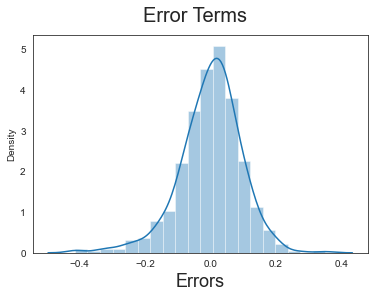

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

## Making Predictions

#### Applying the scaling on the test sets

In [98]:
num_vars = ['temp', 'humidity', 'windspeed','total_count']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [99]:
y_test = df_test.pop('total_count')
X_test = df_test

In [100]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new9.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [101]:
y_pred = lm8.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

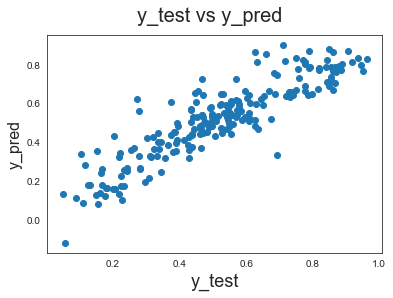

In [102]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)        

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.79700117427111